In [2]:
import pylab as pl
import os
import json
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import datetime
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.api import abline_plot
%matplotlib inline

### 1. Read Independent Variables --- Daily Data

In [104]:
x_day = pd.read_excel('W_Report_External_June2020.xlsx',sheet_name='Data', \
                     index_col = 0, \
                     skiprows=195,
                     nrows= 3, 
                     usecols=range(1,1645)).T
x_day.dropna(thresh = 10, axis = 1,inplace = True)
x_day.head(8)

,[Chart 23]Wayfair Number of Orders / Amazon Number of Orders
2016-01-01 00:00:00,0.003651
2016-01-02 00:00:00,0.004008
2016-01-03 00:00:00,0.004021
2016-01-04 00:00:00,0.002797
2016-01-05 00:00:00,0.004895
2016-01-06 00:00:00,0.002930
2016-01-07 00:00:00,0.003754
2016-01-08 00:00:00,0.004000


In [118]:
# Transform daily data to quarterly

In [146]:

x_day.index = pd.to_datetime(x_day.index,format='%Y-%m-%d %H:%M:%S')
g = x_day.groupby(pd.Grouper(freq="3M"))
x_dtq = g.sum()

x_dtq = x_dtq.iloc[1:-1,:]
x_dtq.reset_index(inplace= True,drop=True)
x_dtq.shape

(17, 1)

In [147]:
x_dtq.head()

,[Chart 23]Wayfair Number of Orders / Amazon Number of Orders
0,0.369397
1,0.392735
2,0.421170
3,0.430377
4,0.402109


In [148]:
# Transform daily data to monthly

In [149]:


g = x_day.groupby(pd.Grouper(freq="M"))
x_dtm = g.sum()
x_dtm.reset_index(inplace= True,drop=True)

x_dtm.shape

(54, 1)

### 1.2 Read Independent Variable ---Quaterly Data

In [150]:
pd.read_excel('W_Report_External_June2020.xlsx',sheet_name='Data', index_col = 0, skiprows=88,nrows= 105, usecols=range(1,20)).T.head(7)

,nan,[Chart 1]Quarterly Active Customers ----- [Chart 1],[Chart 1]Active Customers Index,[Chart 1]Wayfair Reported Active Customers,[Chart 1]Rakuten Intelligence Active Users Estimate,nan,[Chart 1]Active Customers - YoY % Change,[Chart 1]Wayfair Reported Active Customers - YoY % Change,[Chart 1]Rakuten Intelligence Active Users Estimate - YoY % Change,nan,...,[Chart 11]Other Brands of Wayfair,[Chart 11]Joss & Main,[Chart 11]All Modern.com,[Chart 11]Birch Lane,nan,[Chart 11]Wayfair - YoY % Change,[Chart 11]Other Brands of Wayfair - YoY % Change,[Chart 11]Joss & Main - YoY % Change,[Chart 11]All Modern.com - YoY % Change,[Chart 11]Birch Lane - YoY % Change
2016-03-31,NaN,NaN,1.000000,6074.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.904973,1.860285,1.985155,2.079932,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,NaN,NaN,1.172934,6672.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.189114,2.195209,2.150386,2.308280,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-30,NaN,NaN,1.376587,7362.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.059716,2.084735,1.984975,2.095473,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,1.608786,8250.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.110305,2.151120,2.043601,1.777490,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,NaN,NaN,1.835355,8855.0,9116.470974,NaN,0.835355,0.457853,0.500901,NaN,...,1.766171,1.705903,1.935786,1.919639,NaN,-0.019992,-0.072863,-0.082989,-0.024869,-0.077066
2017-06-30,NaN,NaN,2.068085,9547.0,9476.449974,NaN,0.763172,0.430905,0.420331,NaN,...,1.820582,1.759357,1.963005,1.902067,NaN,-0.029895,-0.168348,-0.198547,-0.087138,-0.175981
2017-09-30,NaN,NaN,2.310099,10250.0,10266.604840,NaN,0.678135,0.392285,0.394540,NaN,...,1.727191,1.658104,1.818472,1.836221,NaN,0.044047,-0.161442,-0.204646,-0.083882,-0.123720


In [208]:
#Read excel quarterly data
x_qt = pd.read_excel('W_Report_External_June2020.xlsx',sheet_name='Data', \
                     index_col = 0, 
                     skiprows=88,
                     nrows= 105, 
                     usecols=range(1,20)).T

#Remove all Rakuten Estimate and YoY% Column
_col = []
for i, col in enumerate(x_qt.columns):
    if col is not np.nan and "Estimate" not in col and "%" not in col:
        _col.append(i)       
x_qt = x_qt.iloc[:-1,_col]

#Drop column np.nan > 10
x_qt.dropna(thresh = 10, axis = 1,inplace = True)

#Add seasonality  3 column Q1, Q2, Q3 
x_qt['quarter'] = (pd.to_datetime(x_qt.index,format='%Y-%m-%d').month)//3
x_qt['Q1'] = [1 if i==1 else 0 for i in x_qt.quarter]
x_qt['Q2'] = [1 if i==2 else 0 for i in x_qt.quarter]
x_qt['Q3'] = [1 if i==3 else 0 for i in x_qt.quarter]
x_qt.drop('quarter',axis = 1,inplace = True)

#Make new feature by logictis
#1. Active customer Total Revenue
x_qt['Active_Customers_Total_Revenue'] = x_qt[' [Chart 4]Wayfair Reported Net Revenue per Active Customer'] * x_qt[' [Chart 1]Wayfair Reported Active Customers']

#2.Average item per order = Share of Order by websites * item per order by websites
x_qt['Avg_item_per_order'] = x_qt[' [Chart 7]Wayfair'] * x_qt['[Chart 11]Wayfair'] +\
                              (x_qt[' [Chart 7]Joss & Main'] +\
                              x_qt[' [Chart 7]All Modern.com'] +\
                              x_qt[' [Chart 7]Birch Lane']) * x_qt['[Chart 11]Other Brands of Wayfair']

    #3. Average price = Revenue per order / Average Item per order
x_qt['Avg_price'] = x_qt[' [Chart 2]Wayfair Reported Average Order Value'] / x_qt['Avg_item_per_order']

x_qt.reset_index(inplace = True)
x_qt.rename(columns = {'index':'date'},inplace = True)

#Merge data from daily transformed
x_qt = x_qt.merge(x_dtq, left_index=True, right_index=True)
x_qt.reset_index(inplace = True,drop = True)

In [209]:
x_qt.shape

(17, 43)

In [210]:
x_qt.head()

,date,[Chart 1]Active Customers Index,[Chart 1]Wayfair Reported Active Customers,[Chart 2]Average Order Value,[Chart 2]Wayfair Reported Average Order Value,[Chart 3]Number of Orders per Active Customer,[Chart 3]Wayfair Reported Number of Orders per Active Customer,[Chart 4]Net Revenue per Active Customer,[Chart 4]Wayfair Reported Net Revenue per Active Customer,[Chart 5]Share of Repeat Orders,...,[Chart 11]Joss & Main,[Chart 11]All Modern.com,[Chart 11]Birch Lane,Q1,Q2,Q3,Active_Customers_Total_Revenue,Avg_item_per_order,Avg_price,[Chart 23]Wayfair Number of Orders / Amazon Number of Orders
0,2016-03-31,1.000000,6074.0,245.161366,238.0,1.683282,1.71,408.752501,392.0,0.471380,...,1.860285,1.985155,2.079932,1,0,0,2381008.0,1.956084,121.671655,0.369397
1,2016-06-30,1.172934,6672.0,268.915702,258.0,1.711517,1.70,428.911604,404.0,0.504014,...,2.195209,2.150386,2.308280,0,1,0,2695488.0,2.048182,125.965344,0.392735
2,2016-09-30,1.376587,7362.0,267.689072,244.0,1.739062,1.69,443.508085,406.0,0.513370,...,2.084735,1.984975,2.095473,0,0,1,2988972.0,1.955091,124.802407,0.421170
3,2016-12-31,1.608786,8250.0,239.605951,203.0,1.762393,1.71,443.577077,395.0,0.532766,...,2.151120,2.043601,1.777490,0,0,0,3258750.0,2.034318,99.787738,0.430377
4,2017-03-31,1.835355,8855.0,255.866456,223.0,1.758548,1.73,442.023478,394.0,0.548794,...,1.705903,1.935786,1.919639,1,0,0,3488870.0,1.899040,117.427730,0.402109


In [211]:
x_save = x_qt

### 2. After loading the data, do correlation analysis to exclude colinearity features

In [212]:
prof = ProfileReport(x_qt.iloc[:,2:])
prof

Number of variables,41
Number of observations,17
Total Missing (%),0.0%
Total size in memory,5.5 KiB
Average record size in memory,332.7 B
Numeric,19
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,19


In [213]:
prof.get_rejected_variables()

[' [Chart 3]Number of Orders per Active Customer',
 ' [Chart 3]Wayfair Reported Number of Orders per Active Customer',
 ' [Chart 4]Net Revenue per Active Customer',
 ' [Chart 4]Wayfair Reported Net Revenue per Active Customer',
 ' [Chart 5]Share of Repeat Orders',
 ' [Chart 6]New Orders',
 ' [Chart 6]Repeat Orders',
 ' [Chart 7]Wayfair',
 ' [Chart 8]Joss & Main',
 ' [Chart 8]Wayfair',
 ' [Chart 9]Joss & Main',
 ' [Chart 9]Wayfair',
 'Active_Customers_Total_Revenue',
 'Avg_item_per_order',
 '[Chart 10]All Modern.com',
 '[Chart 10]Joss & Main',
 '[Chart 10]Other Brands of Wayfair',
 '[Chart 10]Wayfair',
 '[Chart 11]Joss & Main']

+ I feed the correlation testing model with 40 columns using pandas profiling(without date and active customr index which definition is not clear. From previous analysis with Pearon heatmap correlation analysis, about 19 columns will be  deleted/rejected from the dataframe with high collinearity. 

+ However, Active_Customers_Total is a logistic feature added manually, which made up with Chart 1 and 4 features. In that case, I will add Active_Customers_Total_Revenue back and delete the corresponding high collinearity features [Chart 10] and[Chart 1] .

+ Avg_item_per_order has a similar feature in raw data, so I will delete it

In [214]:
_col = []
delet_col = ['index','date',
    ' [Chart 1]Active Customers Index',
 ' [Chart 1]Wayfair Reported Active Customers',
 ' [Chart 3]Number of Orders per Active Customer',
 ' [Chart 3]Wayfair Reported Number of Orders per Active Customer',
 ' [Chart 4]Net Revenue per Active Customer',
 ' [Chart 4]Wayfair Reported Net Revenue per Active Customer',
 ' [Chart 5]Share of Repeat Orders',
 ' [Chart 6]New Orders',
 ' [Chart 6]Repeat Orders',
 ' [Chart 7]Wayfair',
 ' [Chart 8]Joss & Main',
 ' [Chart 8]Wayfair',
' [Chart 9]Other Brands of Wayfair',
 ' [Chart 9]Joss & Main',
 ' [Chart 9]Wayfair',
 'Avg_item_per_order',
 '[Chart 10]All Modern.com',
 '[Chart 10]Joss & Main',
 '[Chart 10]Other Brands of Wayfair',
 '[Chart 10]Wayfair',
 '[Chart 11]Joss & Main']
for i, col in enumerate(x_qt.columns):
    if col not in delet_col:
        _col.append(i)
        
x_qt = x_qt.iloc[:,_col]
prof2 = ProfileReport(x_qt)
prof2

Number of variables,21
Number of observations,17
Total Missing (%),0.0%
Total size in memory,2.9 KiB
Average record size in memory,172.7 B
Numeric,18
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [215]:
prof2.get_rejected_variables()

[]

### Now the preliminary input data processing is finished.

### 2. Read Dependent Variable

In [216]:
y_qt = pd.read_excel('Book4.xlsx',index_col = 0, \
                     nrows= 2, 
                     skiprows= 4,
                     usecols=range(4,28)).T
y_qt.reset_index(inplace= True,drop=True)
y_qt.drop(labels = [4,9,14,19,21], inplace = True)
y_qt.reset_index(drop=True, inplace=True)

In [217]:
y_qt.shape

(17, 1)

In [218]:
x_qt.shape

(17, 21)

### 3. Fit into Linear Regression

In [219]:
x_qtn = sma.add_constant(x_qt)

model = smf.OLS(y_qt, x_qtn).fit()
model.summary()

/Users/xiaojing/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1550: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning: divide by zero encountered in double_scalars
  return self.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       US Direct Retail   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                nan
Time:                        19:12:32   Log-Likelihood:                 202.82
No. Observations:                  17   AIC:                            -371.6
Df Residuals:                       0   BIC:                            -357.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                         1664.8099        inf          0        nan         nan         nan
 [Chart 2]Average Order Value                                    3.2191        inf          0        nan         nan         nan
 [Chart 2]Wayfair Reported Average Order Value                  -8.1470        inf         -0        nan         nan         nan
 [Chart 7]Joss & Main                                        -3243.9149        inf         -0        nan         nan         nan
 [Chart 7]All Modern.com                                      -752.0071        inf         -0        nan         nan         nan
 [Chart 7]Birch Lane                                         -1552.8453        inf         -0        nan         nan         nan
 [Chart 8]Other Brands of Wayfair                               -6.2820        inf         -0        nan         nan         nan
 [Chart 8]All Modern.com                                         1.9975        inf          0        nan         nan         nan
 [Chart 8]Birch Lane                                            -2.0645        inf         -0        nan         nan         nan
 [Chart 9]All Modern.com                                     -2662.6100        inf         -0        nan         nan         nan
 [Chart 9]Birch Lane                                          3343.8274        inf          0        nan         nan         nan
[Chart 10]Birch Lane                                             0.1468        inf          0        nan         nan         nan
[Chart 11]Wayfair                                             1915.7168        inf          0        nan         nan         nan
[Chart 11]Other Brands of Wayfair                             -827.6058        inf         -0        nan         nan         nan
[Chart 11]All Modern.com                                       -82.6313        inf         -0        nan         nan         nan
[Chart 11]Birch Lane                                            94.8771        inf          0        nan         nan         nan
Q1                                                             -21.7330        inf         -0        nan         nan         nan
Q2                                                             319.2121        inf          0        nan         nan         nan
Q3                                                              42.5104        inf          0        nan         nan         nan
Active_Customers_Total_Revenue                                9.317e-05        inf          0        nan         nan         nan
Avg_price                                                       -3.9064        inf         -0        nan         nan

### 4. Still High collinerity. I will then fit one feature  each time

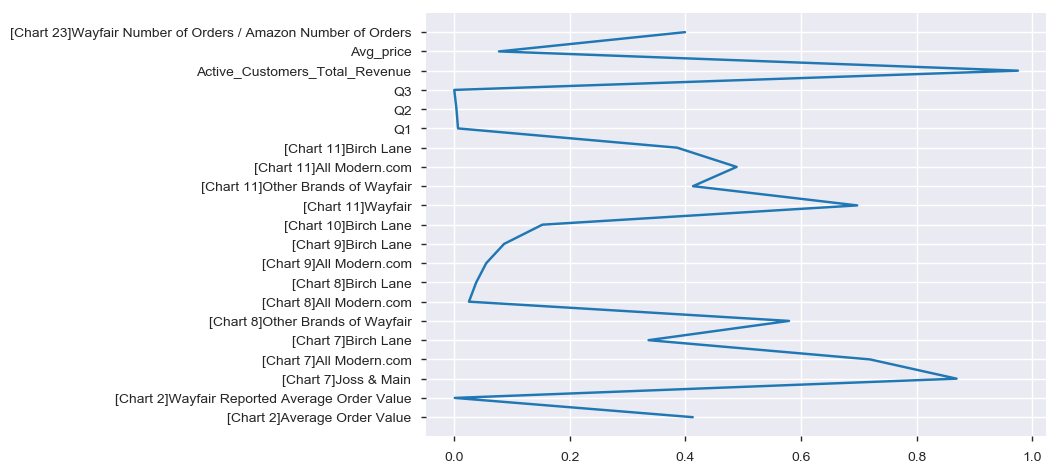

In [220]:
r_2 = []
mse = []
for col in x_qt.columns:
    x = x_qt[[col]]
    x_n = sma.add_constant(x)
    mod = smf.OLS(y_qt, x_n).fit()
    r_2.append(mod.rsquared)
    mse.append(mod.mse_model)
pl.plot(r_2,x_qt.columns)
#pl.plot(mse)

[0.4127626566859237, 0.00143296530417647, 0.8688153751449301, 0.719244894575642, 0.3363695088099392, 0.579181685168362, 0.025919942296370735, 0.038497780472855125, 0.05581771303170968, 0.08667500234159387, 0.15288673304477662, 0.6970709676439054, 0.4131922574051001, 0.48865218864945537, 0.38575483883452555, 0.0070404110751374205, 0.004393803501305693, 0.000559446298189159, 0.9748200642193918, 0.07784373184385485, 0.3994375019449846]


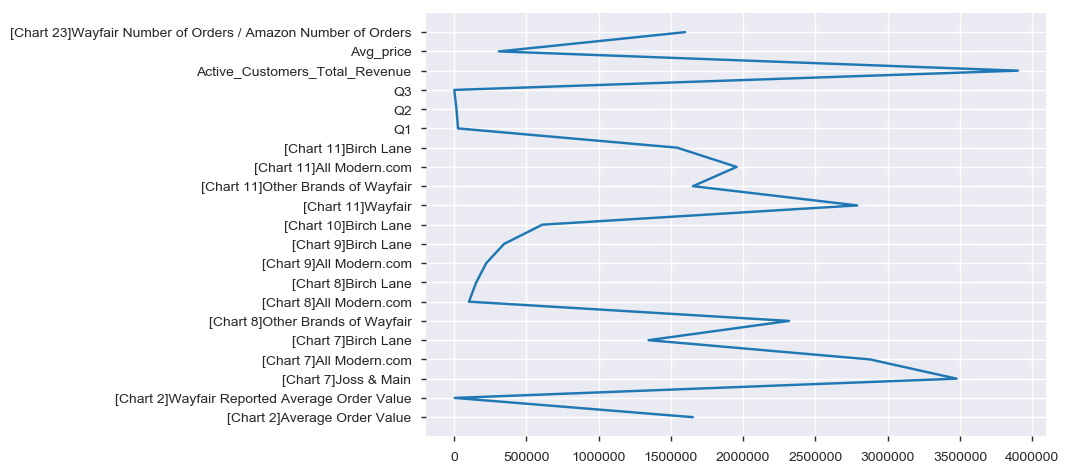

In [221]:
pl.plot(mse,x_qt.columns)
print(r_2)

### Check feature one by one for their R square and MSE
+ For both  R sqaure by feather and MSE by feature, the distribution are similar
+ Active_Customers_Total_Revenue maded up of Chart 1 and Chart 4 
$(Active  Customer * RevenuePerCustomer)$
performed well when fitting the model, 
 of which  R square is 0.975 out of 1, which can explain really high variance

In [222]:
#col = ['Active_Customers_Total_Revenue','Q1','Q2','Q3'] no seasonality, the row data include the whole year data
col = ['Active_Customers_Total_Revenue']
x = x_qt[col]
x_n = sma.add_constant(x)
mod = smf.OLS(y_qt, x_n).fit()
r_2.append(mod.rsquared)
mse.append(mod.mse_model)
mod.summary()

/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       US Direct Retail   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     580.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.09e-13
Time:                        19:12:34   Log-Likelihood:                -97.963
No. Observations:                  17   AIC:                             199.9
Df Residuals:                      15   BIC:                             201.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            164.2064     52.081      3.153      0.007      53.199     275.214
Active_Customers_Total_Revenue     0.0002   8.76e-06     24.098      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.113   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                1.136
Skew:                          -0.366   Prob(JB):                        0.567
Kurtosis:                       4.032   Cond. No.                     1.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
mod.predict()

array([ 667.00634948,  733.41541851,  795.39074036,  852.36004151,
        900.95472151,  974.65848299, 1047.32370529, 1143.57124245,
       1240.21578116, 1352.77839295, 1460.79238052, 1581.93803929,
       1695.68975522, 1844.40991737, 1972.43848505, 2083.73428177,
       2165.57826455])

### 5. To Test if add one more parameter, which will be choose

In [224]:
r_2 = []
for i in x_qt.columns:
    col = ['Active_Customers_Total_Revenue']
    col.append(i)
    x = x_qt[col]
    x_n = sma.add_constant(x)
    mod1 = smf.OLS(y_qt, x_n).fit()
    r_2.append(mod1.rsquared)
    print(mod1.summary())
print(r_2)

/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: User

                            OLS Regression Results                            
Dep. Variable:       US Direct Retail   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     295.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           3.54e-12
Time:                        19:12:43   Log-Likelihood:                -97.240
No. Observations:                  17   AIC:                             200.5
Df Residuals:                      14   BIC:                             203.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

                            OLS Regression Results                            
Dep. Variable:       US Direct Retail   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     323.6
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           1.91e-12
Time:                        19:12:43   Log-Likelihood:                -96.490
No. Observations:                  17   AIC:                             199.0
Df Residuals:                      14   BIC:                             201.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))
/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: User

+ Only Q1, and Active_Customer_Total_Revenue pass the t-test
### Final Model :

In [225]:
col = ['Active_Customers_Total_Revenue','Q1']
x = x_qt[col]
x_n = sma.add_constant(x)
mod = smf.OLS(y_qt, x_n).fit()
r_2.append(mod.rsquared)
mse.append(mod.mse_model)
mod.summary()

/Users/xiaojing/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       US Direct Retail   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     435.4
Date:                Thu, 01 Oct 2020   Prob (F-statistic):           2.48e-13
Time:                        19:12:45   Log-Likelihood:                -94.013
No. Observations:                  17   AIC:                             194.0
Df Residuals:                      14   BIC:                             196.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            193.0273     43.890      4.398      0.001      98.892     287.162
Active_Customers_Total_Revenue     0.0002   7.19e-06     29.405      0.000       0.000       0.000
Q1                              -103.0110     35.796     -2.878      0.012    -179.786     -26.236
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.107
Skew:                           0.042   Prob(JB):                        0.948
Kurtosis:                       2.620   Cond. No.                     1.66e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
mod.predict()

array([ 593.45617009,  762.96075763,  825.01496137,  882.05677278,
        827.70231049, 1004.51087513, 1077.26858537, 1173.63862593,
       1167.39517998, 1383.1120543 , 1491.26352155, 1612.56337393,
       1623.44887913, 1875.36932496, 2003.56084679, 2114.99830026,
       2093.93546031])

In [229]:
y = pd.DataFrame(mod.predict(),columns={'Revenue_Est'})

In [231]:
result = x_save[['Active_Customers_Total_Revenue',\
               'Q1',\
              ' [Chart 4]Wayfair Reported Net Revenue per Active Customer',\
               ' [Chart 1]Wayfair Reported Active Customers']].merge(y_qt, left_index = True, right_index = True)
result = result.merge(y,left_index = True, right_index = True)
result

,Active_Customers_Total_Revenue,Q1,[Chart 4]Wayfair Reported Net Revenue per Active Customer,[Chart 1]Wayfair Reported Active Customers,US Direct Retail,Revenue_Est
0,2381008.0,1,392.0,6074.0,672.700,593.456170
1,2695488.0,0,404.0,6672.0,702.408,762.960758
2,2988972.0,0,406.0,7362.0,759.674,825.014961
3,3258750.0,0,395.0,8250.0,858.583,882.056773
4,3488870.0,1,394.0,8855.0,838.000,827.702310
5,3837894.0,0,402.0,9547.0,976.673,1004.510875
6,4182000.0,0,408.0,10250.0,1033.669,1077.268585
7,4637780.0,0,422.0,10990.0,1227.507,1173.638626
8,5095440.0,1,432.0,11795.0,1186.205,1167.395180
9,5628480.0,0,440.0,12792.0,1397.000,1383.112054


In [232]:
result.to_csv('wayfair_Est.csv')
    
    

### 5. Backup : Independent Variable ---Monthly Data

In [103]:
x_mon = pd.read_excel('W_Report_External_June2020.xlsx',sheet_name='Data', \
                     index_col = 0, \
                     nrows= 85, 
                     usecols=range(1,56)).T
_col = []
for i, col in enumerate(x_mon.columns):
    if col is not np.nan and "Estimate" not in col and "---" not in col and '%' not in col:
        _col.append(i)
        
x_mon = x_mon.iloc[:,_col]
x_mon.dropna(thresh = 10, axis = 1,inplace = True)
x_mon.shape

(54, 31)

In [1]:
import pandas as pd